In [1]:
          # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
data = pd.read_csv("heart.csv")

In [5]:
print("Basic Info:")
print(data.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std   

In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



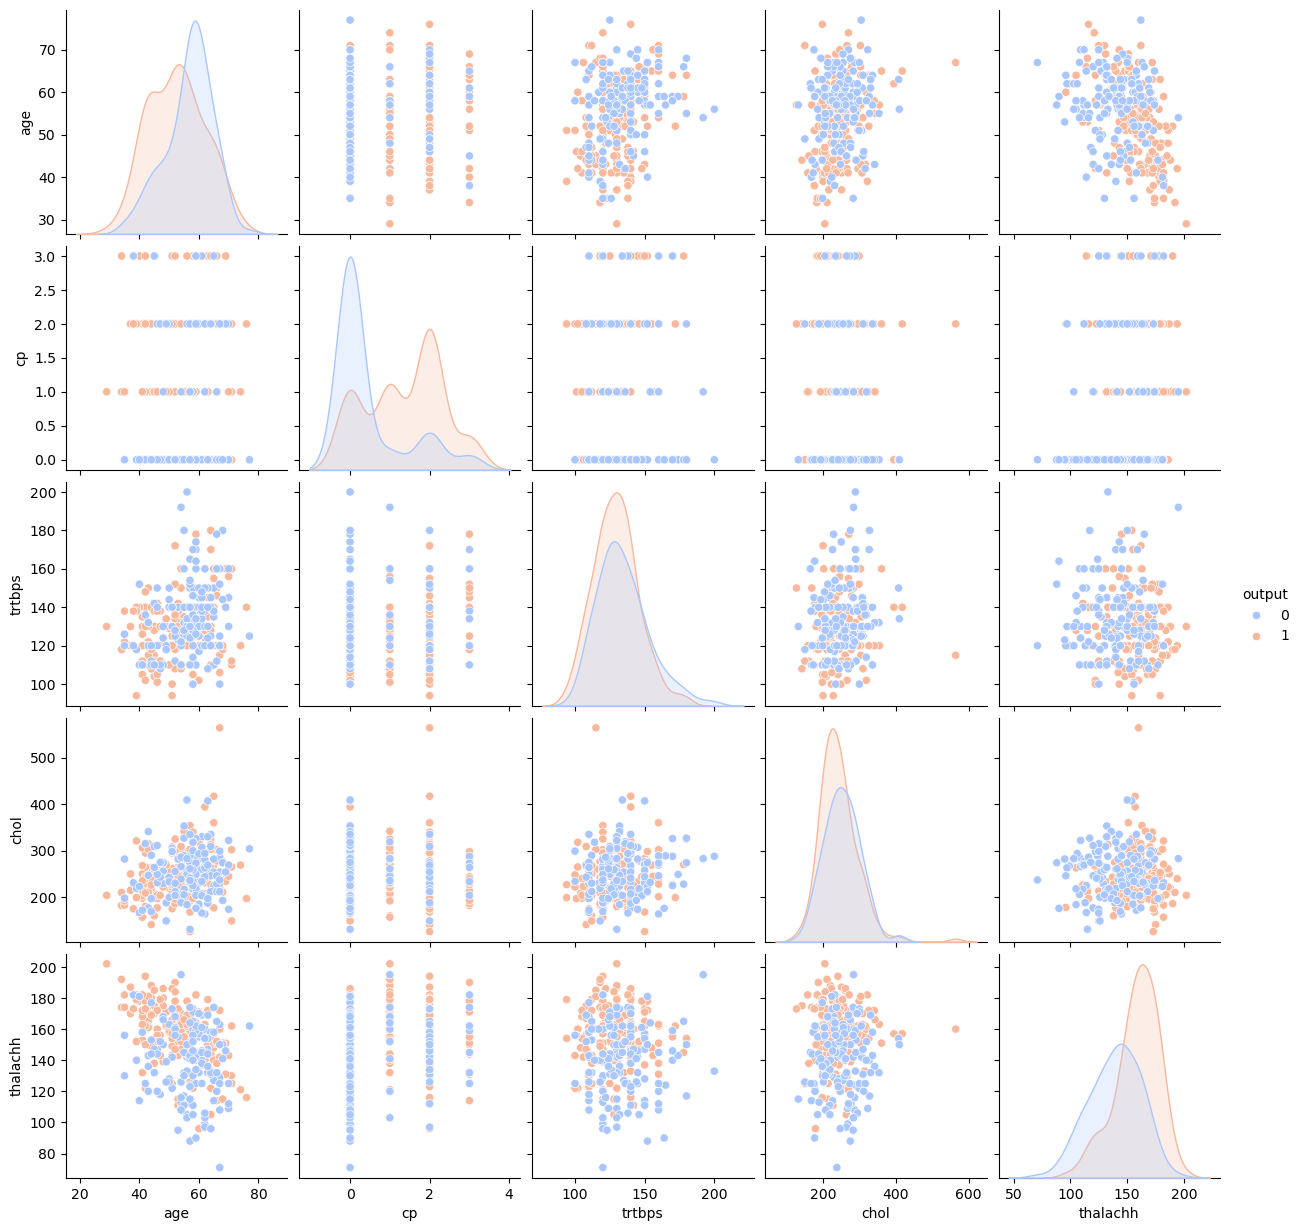

In [13]:
# Selecting a subset of the columns for better visualization
subset =data[['age', 'cp', 'trtbps', 'chol', 'thalachh', 'output']]

# Generate the pair plot
sns.pairplot(subset, hue='output', palette='coolwarm')
plt.show()


In [15]:
X = data.drop(columns=['output'])
y = data['output']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# Initialize models
nb_model = GaussianNB()
svm_model = SVC()

In [21]:
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [23]:
# Train and evaluate SVM classifier
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [25]:
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


In [27]:

# Calculate evaluation metrics for both models
print("Naive Bayes Performance:")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")

print("\nSVM Performance:")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")

Naive Bayes Performance:
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839
Accuracy: 0.8688524590163934

SVM Performance:
Precision: 0.6666666666666666
Recall: 0.875
F1 Score: 0.7567567567567568
Accuracy: 0.7049180327868853


In [29]:
# Initialize GridSearchCV to find the best hyperparameters for SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# Predict with the best parameters found by GridSearchCV
y_pred_svm_tuned = grid.predict(X_test)

# Evaluate the tuned SVM model
print("\nTuned SVM Performance:")
print(f"Precision: {precision_score(y_test, y_pred_svm_tuned)}")
print(f"Recall: {recall_score(y_test, y_pred_svm_tuned)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm_tuned)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_tuned)}")

# Output best parameters
print("\nBest Parameters for SVM:")
print(grid.best_params_)




Tuned SVM Performance:
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839
Accuracy: 0.8688524590163934

Best Parameters for SVM:
{'C': 100, 'gamma': 1, 'kernel': 'linear'}
